<h1>Exploration of Football World Cup Attendance</h1>

<p>This is based in the exercises from the course Data Visualization and D3 (Udacity.com)<p>

In [1]:
import pandas

#the coment part permit to graph offline using the iplot function
#from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
#init_notebook_mode(connected=True)


import plotly.plotly as py
from IPython.display import Image

from plotly.graph_objs import Bar, Scatter, Figure, Layout




In [2]:
world_cup_geo = pandas.read_csv("world_cup_geo.tsv",sep='\t')

In [3]:
world_cup_geo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836 entries, 0 to 835
Data columns (total 19 columns):
game_id       836 non-null int64
attendance    836 non-null int64
team1         836 non-null object
team2         836 non-null object
goals         836 non-null object
tie           836 non-null bool
pk            836 non-null object
stage         836 non-null object
round         836 non-null object
year          836 non-null int64
date          836 non-null object
time          836 non-null object
stadium       836 non-null object
home          836 non-null object
lat           836 non-null object
long          836 non-null object
referee       836 non-null object
booked        288 non-null object
url           836 non-null object
dtypes: bool(1), int64(3), object(15)
memory usage: 118.5+ KB


In [4]:
world_cup_geo.head()

,game_id,attendance,team1,team2,goals,tie,pk,stage,round,year,date,time,stadium,home,lat,long,referee,booked,url
0,1,25000,Italy,USA,7-1,False,False,FIRST ROUND,False,1934,27-05-1934 (16:00 h),16:00,Stadio Nazionale del PNF (Roma),Italy,41.926953,12.472197,RenÃ© Mercet (SWI),NaN,1934_ITALY_FS.htm
1,2,16000,Austria,France,3-2,False,False,FIRST ROUND,False,1934,27-05-1934 (16:30 h),16:30,Benito Mussolini (Torino),Italy,45.066251,7.691228,John van Moorsel (NED),NaN,1934_ITALY_FS.htm
2,3,8000,Germany,Belgium,5-2,False,False,FIRST ROUND,False,1934,27-05-1934 (16:30 h),16:30,Giovanni Berta (Firenze),Italy,44.275234,11.722625,Francesco Mattea (ITA),NaN,1934_ITALY_FS.htm
3,4,9000,Czechoslovakia,Romania,2-1,False,False,FIRST ROUND,False,1934,27-05-1934 (16:30 h),16:30,Stadio del Littorio (Trieste),Italy,45.62243,13.792906,Jean Langenus (BEL),NaN,1934_ITALY_FS.htm
4,5,33000,Switzerland,Netherlands,3-2,False,False,FIRST ROUND,False,1934,27-05-1934 (16:30 h),16:30,San Siro (Milano),Italy,45.478124,9.123962,Ivan Eklind (SWE),NaN,1934_ITALY_FS.htm


In [5]:
#Filter some columns and convert others in numeric

world_cup_geo['lat'] = pandas.to_numeric(world_cup_geo['lat'], 
                                                  errors='coerce')
world_cup_geo['long'] = pandas.to_numeric(world_cup_geo['long'], 
                                                   errors='coerce')

world_cup_geo_filtered = world_cup_geo[['attendance','team1','team2','year','home'
                                        ,'lat','long']].copy()


In [6]:
#Dataframe with only the total attendance by year

attendance_year = world_cup_geo.groupby(['year','home']).sum().copy()
attendance_year.reset_index(inplace=True)
attendance_year = attendance_year[['year','home','attendance']]

In [7]:
#iplot([{"x": attendance_year['year'], "y": attendance_year['attendance']}])

In [8]:
from plotly.tools import set_credentials_file
#use your file credentials of pyplot
#set_credentials_file(username='UserName', api_key='ApiKey')

In [9]:
data = [Scatter(x= attendance_year['year'], y= attendance_year['attendance'])]

layout = Layout(title='Word Cup Attendance')
fig = Figure(data=data,layout=layout)

py.image.save_as(fig, 'word_cup_attendance_by_year.png')

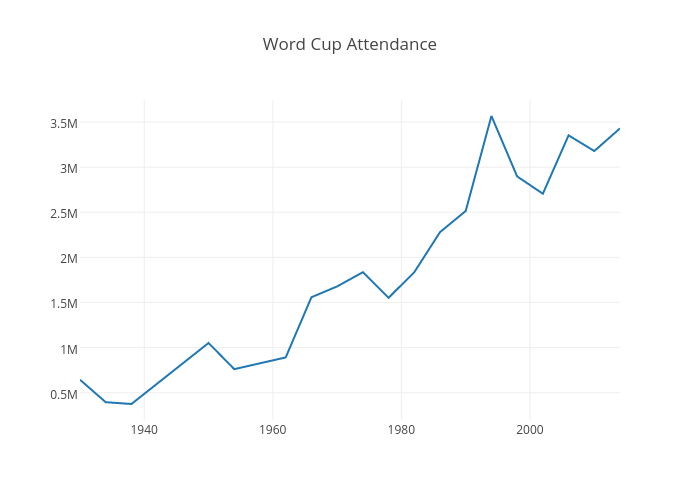

In [10]:

Image(filename='word_cup_attendance_by_year.png') 


In [11]:
#Export the dataframes for work with D3

world_cup_geo_filtered.to_csv('world_cup_geo_filtered.csv')
attendance_year.to_csv('worls_cup_attendance_year.csv')

In [12]:
df = world_cup_geo.copy()
df = df.dropna()
df.reset_index(inplace=True)

scale = 3000

city = dict(
    type = 'scattergeo',
    locationmode = 'country-name',
    lon = df['long'],
    lat = df['lat'],
    marker = dict(
        size = df['attendance']/scale,
        color = 'rgb(24,190,207)',
        line = dict(width=0.5, color='rgb(0,0,0)'),
        sizemode = 'area'
    ),
    name = 'Attendance')


layout = dict(
        title = 'World Cup Attendance',
        showlegend = True,
        geo = dict(
            scope='world',
            projection=dict( type='world' ),
            showland = True,
            landcolor = 'rgb(217, 217, 217)',
            subunitwidth=1,
            countrywidth=1,
            subunitcolor="rgb(255, 255, 255)",
            countrycolor="rgb(255, 255, 255)",
            showcountries=True
        ),
    )

fig = dict( data=[city], layout=layout )
#iplot( fig, validate=False, filename='d-bubble-map-populations' )
py.image.save_as(fig, 'word_cup_attendance_geo.png')


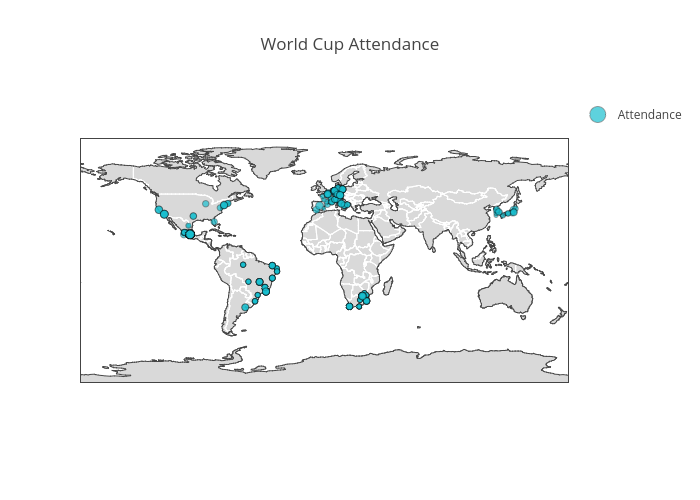

In [13]:
Image(filename='word_cup_attendance_geo.png') 